In [3]:
import tensorflow as tf

In [4]:
# scalar
x = tf.constant(5)
y = tf.constant(15)
z = x + y
print(z)

tf.Tensor(20, shape=(), dtype=int32)


In [5]:
# Vector

x = tf.constant([1, 4, 1])
y = tf.constant([4, 4, 5])
print(f"Multiplication : {x * y}")
print(f"Addition : {x + y}")
print(f"Subtraction : {x - y}")
print(f"Divide : {x / y}")

Multiplication : [ 4 16  5]
Addition : [5 8 6]
Subtraction : [-3  0 -4]
Divide : [0.25 1.   0.2 ]


In [6]:
# Matrix

x = tf.constant([
    [1, 2], [6, 3]
])
y = tf.constant([
    [1, 0], [0, 1]
])
print(f"Multiplication :\n {x * y}")
print(f"Addition :\n {x + y}")
print(f"Subtraction :\n {x - y}")
print(f"Divide :\n {x / y}")


Multiplication :
 [[1 0]
 [0 3]]
Addition :
 [[2 2]
 [6 4]]
Subtraction :
 [[0 2]
 [6 2]]
Divide :
 [[ 1. inf]
 [inf  3.]]


In [7]:
# Scalar and Vector
x = tf.constant([1, 2, 4])
y = tf.constant(2)

print(f"Multiplication :\n {x * y}")
print(f"Addition :\n {x + y}")
print(f"Subtraction :\n {x - y}")
print(f"Divide :\n {x / y}")


Multiplication :
 [2 4 8]
Addition :
 [3 4 6]
Subtraction :
 [-1  0  2]
Divide :
 [0.5 1.  2. ]


# Tensor Compatibility and Broadcasting in TensorFlow

## Tensor Compatibility
- **Definition**: TensorFlow allows operations on tensors of different shapes by automatically aligning their dimensions, following certain rules.
- **Key Points**:
  1. Tensors must be **broadcast-compatible** to perform element-wise operations.
  2. Shapes are compared starting from the **trailing dimensions** (rightmost) and moving left.

## Broadcasting in TensorFlow
- **Broadcasting** is a mechanism to perform operations on tensors with different shapes without explicitly reshaping them.
- **Rules for Broadcasting**:
  1. If the dimensions of two tensors are equal, they are compatible.
  2. If one of the tensors has a dimension of size `1`, it can be broadcast to match the other tensor’s size in that dimension.
  3. If the dimensions are unequal and neither is `1`, the tensors are incompatible.

### Broadcasting Examples:
| Tensor A Shape | Tensor B Shape | Result       | Explanation                                    |
|----------------|----------------|--------------|------------------------------------------------|
| (5, 4)         | (5, 4)         | (5, 4)       | Shapes are identical.                         |
| (5, 4)         | (1, 4)         | (5, 4)       | Tensor B's first dimension is broadcast.      |
| (5, 4)         | (5, 1)         | (5, 4)       | Tensor B's second dimension is broadcast.     |
| (5, 4, 3)      | (3,)           | (5, 4, 3)    | Tensor B is broadcast along the first two dims.|
| (5, 4)         | (3, 4)         | Incompatible | First dimensions differ (5 != 3).             |

## Practical Tips:
1. **Use TensorFlow functions**:
   - Functions like `tf.expand_dims` or `tf.reshape` can explicitly modify shapes to make tensors compatible.
   - Example: `tf.expand_dims(tensor, axis=-1)` adds a new dimension.

2. **Automatic Broadcasting**:
   - TensorFlow automatically applies broadcasting for operations like addition (`+`), subtraction (`-`), multiplication (`*`), and division (`/`).
   - Example:
     ```python
     import tensorflow as tf
     a = tf.constant([[1, 2, 3]])
     b = tf.constant([[1], [2], [3]])
     result = a + b  # Resulting shape: (3, 3)
     ```

3. **Debugging Incompatibility**:
   - Use `tf.debugging.assert_shapes` to verify compatibility.
   - Check shapes using `tensor.shape`.

## References:
- TensorFlow Broadcasting Documentation: [TensorFlow Guide](https://www.tensorflow.org/guide)


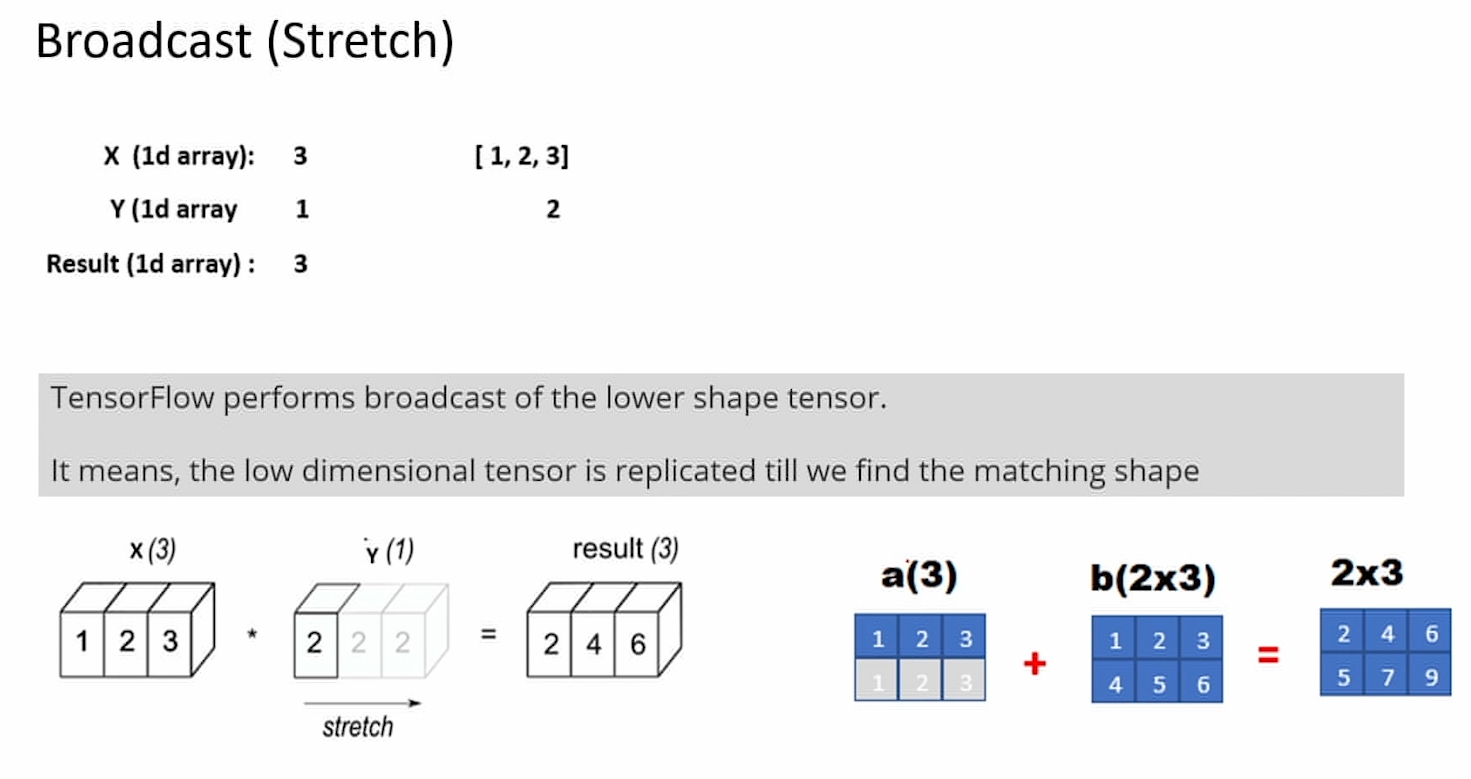

In [11]:
# Example of brodcast
x = tf.constant([1, 2, 3])
y = tf.constant([[4], [5], [6]])

print(f"shape of x : {x.shape}" )
print(f"shape of y : {y.shape}" )

z = x + y
print(f"x + y = \n{z}")
print(f"shape of z : {z.shape}")

shape of x : (3,)
shape of y : (3, 1)
x + y = 
[[5 6 7]
 [6 7 8]
 [7 8 9]]
shape of z : (3, 3)


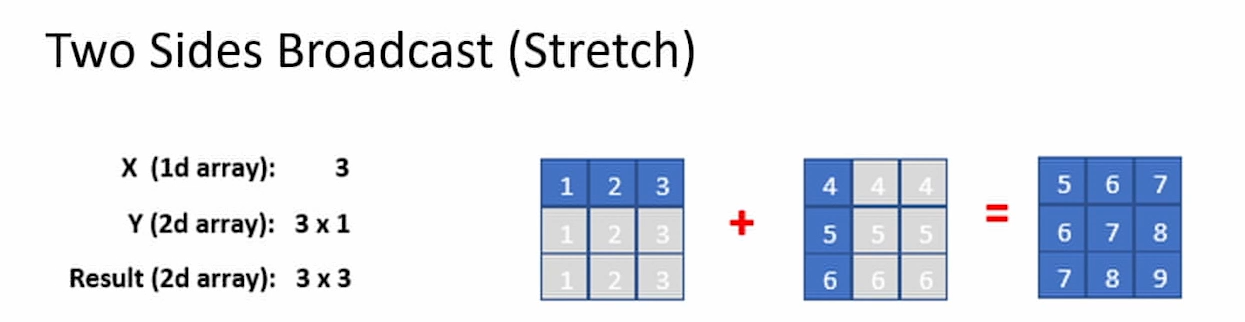

### Let's take another example

- We have $x = [1, 2, 3, 4]$ and 
$$
y = \begin{pmatrix}
4&&6&&7&&8 \\
9&&10&&11&&12
\end{pmatrix}$$

- So here we will have 
$$
    \begin{pmatrix}
        1 && 2 && 3 && 4\\
        1 && 1 && 1 && 1
    \end{pmatrix}         + \begin{pmatrix}
4&&6&&7&&8 \\
9&&10&&11&&12
\end{pmatrix}$$
$$

In [12]:
# Another Example
x = tf.constant([1, 2, 3, 4])
y = tf.constant([[4, 6, 7, 8], [9, 10, 11, 12]])
print(f"shape of x : {x.shape}" )
print(f"shape of y : {y.shape}" )

z = x + y
print(f"x + y = \n{z}")
print(f"shape of z : {z.shape}")

shape of x : (4,)
shape of y : (2, 4)
x + y = 
[[ 5  8 10 12]
 [10 12 14 16]]
shape of z : (2, 4)


In [13]:
# Incompatible Example
# x = tf.constant([1, 2, 3])
# y = tf.constant([1, 2, 3, 5])

# print(x + y)

InvalidArgumentError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [3] vs. [4] [Op:AddV2] name: 